## LINEAR REGRESSION ASSIGNMENT

### IMPORT LIBRARIES

In [1280]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


## Reading and Understanding the Data 

In [1281]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


 ### GIVEN MEANING OF DATA 
 
    - instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	

In [1282]:
df.shape

(730, 16)

In [1283]:
#CHEKING NULL VALUES

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1284]:
df.describe()                                           ##MEAN AND MEDIAN SAME SO THERE ARE NO SIGNIFICANT OUTLIER.

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## DATA PREPARATION

In [1285]:
### DROPPING COLUMNS 'dteday' ,'casual','registered' AS THOSE HAVE COLINEARITY WITH 'yr' and 'cnt' VARIABLE RESPECTIVELY.
df=df.drop(['dteday' ,'casual','registered'], axis=1)
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,2,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,3,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [1286]:
### DROPPING VARIABLE 'instant' as it is not necessary.
df=df.drop(['instant'], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [1287]:
### MAPPING NON BINARY VARIABLES

In [1288]:
df['season']=df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}, na_action=None)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [1289]:
df['weathersit']=df['weathersit'].map({1:'Clear', 2:'Mist', 3:'Light Rain', 4:'Heavy Rain'}, na_action=None)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [1290]:
df['weekday']=df['weekday'].map({0:'Sunday',1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday',5:'Friday',6:'Saturday'}, na_action=None)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [1291]:
df['mnth']=df['mnth'].map({1:'Jan', 2:'Feb', 3:'March', 4:'April',5:'May',6:'Jun',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}, na_action=None)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [1292]:
df['yr']=df['yr'].map({0:'2018', 1:'2019'},na_action=None)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [1293]:
df['holiday']=df['holiday'].map({1:'yes', 0:'No'}, na_action=None)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,No,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,No,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,No,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,No,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,No,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [1294]:
df['workingday']=df['workingday'].map({1:'yes', 0:'No'}, na_action=None)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,No,Monday,yes,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,No,Tuesday,yes,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,No,Wednesday,yes,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,No,Thursday,yes,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,No,Friday,yes,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [1295]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [1296]:
num_df=df[num_cols]
num_df

,temp,atemp,hum,windspeed,cnt
0,14.110847,18.18125,80.5833,10.749882,985
1,14.902598,17.68695,69.6087,16.652113,801
2,8.050924,9.47025,43.7273,16.636703,1349
3,8.200000,10.60610,59.0435,10.739832,1562
4,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...
725,10.420847,11.33210,65.2917,23.458911,2114
726,10.386653,12.75230,59.0000,10.416557,3095
727,10.386653,12.12000,75.2917,8.333661,1341
728,10.489153,11.58500,48.3333,23.500518,1796


In [1297]:
cat_cols=df.select_dtypes(include=np.object).columns.tolist()
cat_cols

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

##### VISUALIZING
###### BIVARIATE

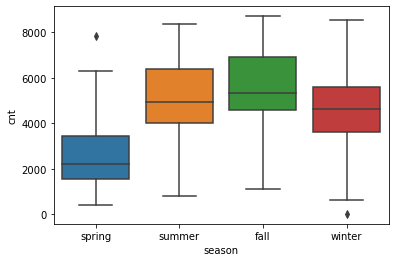

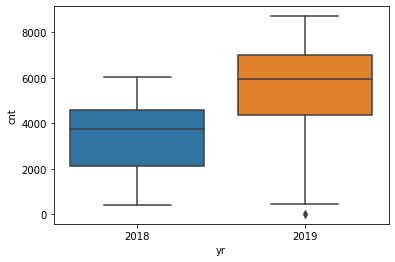

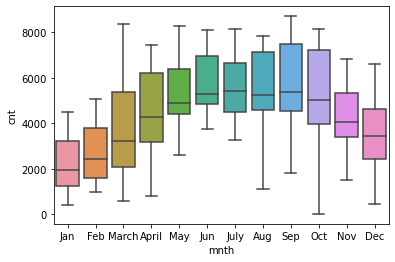

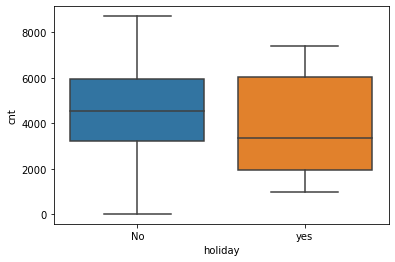

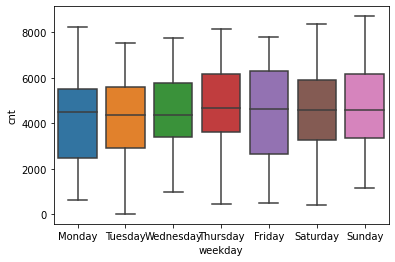

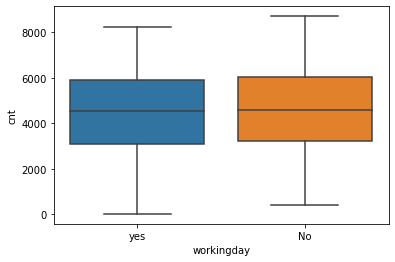

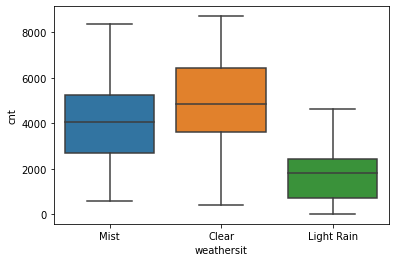

In [742]:
for i in cat_cols:
    sns.boxplot(x=df[i],y=df["cnt"])
    plt.show()

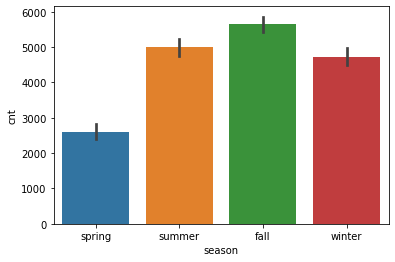

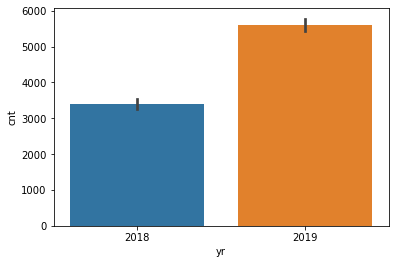

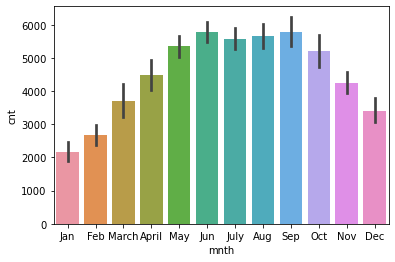

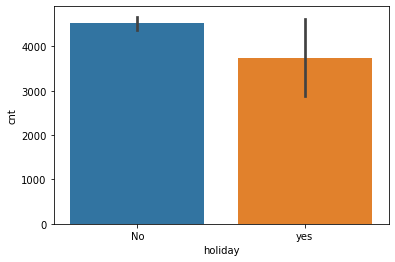

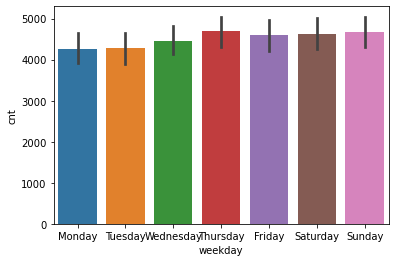

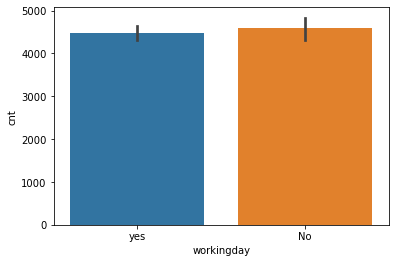

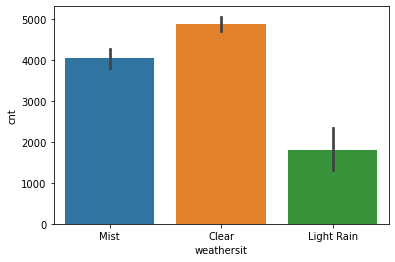

In [743]:
for i in cat_cols:
    sns.barplot(x=df[i],y=df["cnt"])
    plt.show()

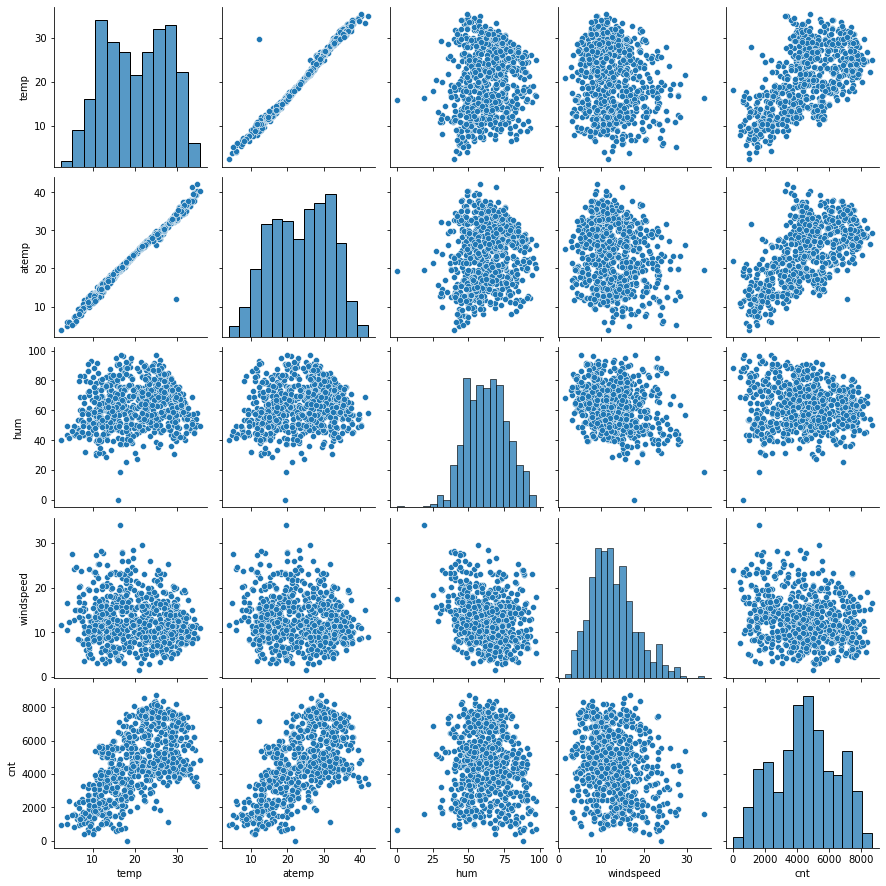

In [744]:
sns.pairplot(num_df);   ### plot for numerical columns

###### UNIVARIATE

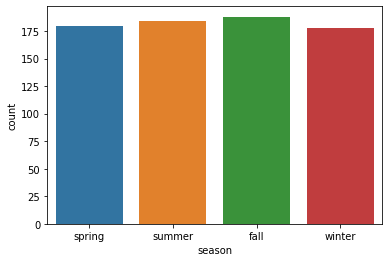

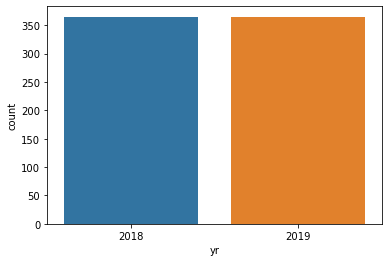

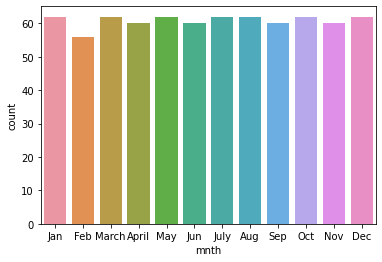

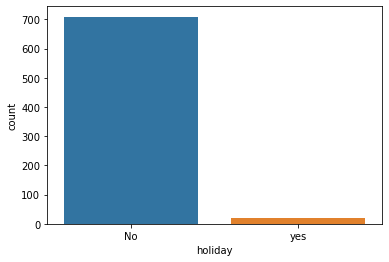

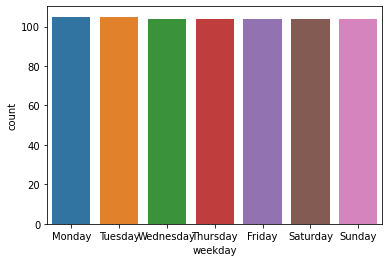

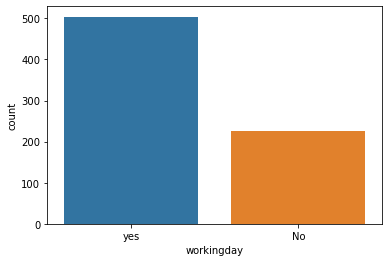

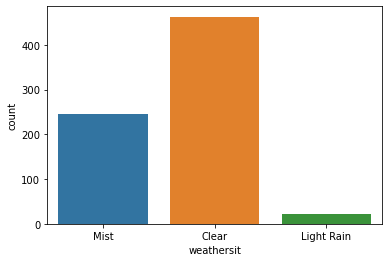

In [745]:
for i in cat_cols:
    sns.countplot(x=df[i])
    plt.show()

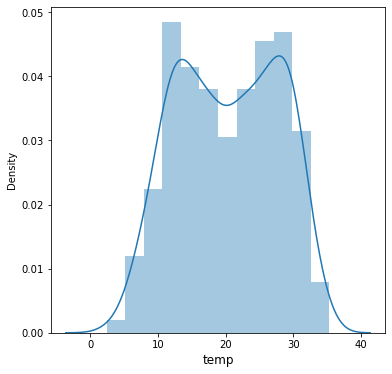

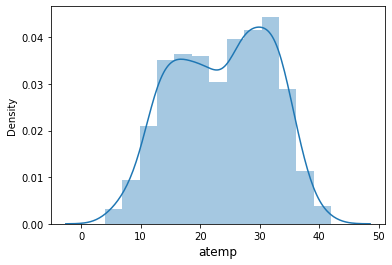

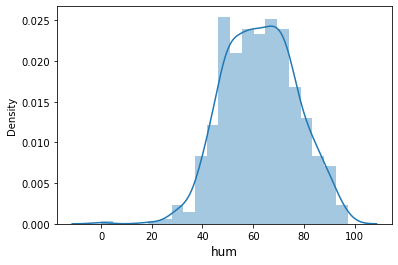

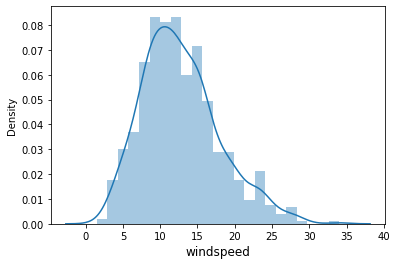

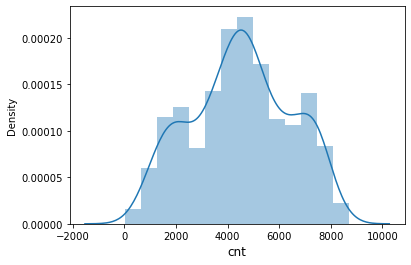

In [746]:
plt.figure(figsize=[6,6])
for i in num_cols:
    sns.distplot(x=num_df[i])
    plt.xlabel(i,fontsize=12)
    plt.show()

### MULTIVARIATE ANALYSIS

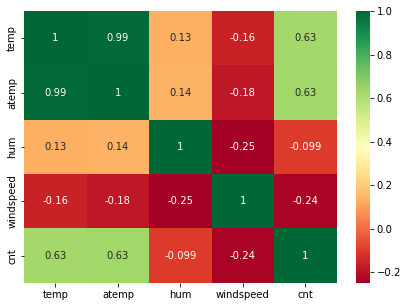

In [747]:
plt.figure(figsize=[7,5])
sns.heatmap(num_df.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [748]:
#### creating dummy variables for all non binary categorical column

In [1298]:
df1=pd.get_dummies(df['season'],drop_first=True)
df1.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [1299]:
df2=pd.get_dummies(df['weathersit'],drop_first=True)
df2.head()

,Light Rain,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [1300]:
df3=pd.get_dummies(df['weekday'],drop_first=True)
df3.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [1301]:
df4=pd.get_dummies(df['mnth'],drop_first=True)
df4.head()

,Aug,Dec,Feb,Jan,July,Jun,March,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [1302]:
df=pd.concat([df1,df2,df3,df4,df],axis=1)
df.head()

,spring,summer,winter,Light Rain,Mist,Monday,Saturday,Sunday,Thursday,Tuesday,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,1,1,0,0,0,0,...,Jan,No,Monday,yes,Mist,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,1,0,0,0,0,1,...,Jan,No,Tuesday,yes,Mist,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,0,0,0,0,...,Jan,No,Wednesday,yes,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,0,0,1,0,...,Jan,No,Thursday,yes,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,0,0,0,0,...,Jan,No,Friday,yes,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [1303]:
df.shape

(730, 34)

In [1304]:
#### DROPPING 'season','weathersit' , 'weekday' & 'mnth' variable as dummies have been created from themselves
df=df.drop(['season' ,'weathersit','weekday','mnth'], axis=1)
df.head()

,spring,summer,winter,Light Rain,Mist,Monday,Saturday,Sunday,Thursday,Tuesday,...,Oct,Sep,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,1,1,0,0,0,0,...,0,0,2018,No,yes,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,1,0,0,0,0,1,...,0,0,2018,No,yes,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,0,0,0,0,...,0,0,2018,No,yes,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,0,0,1,0,...,0,0,2018,No,yes,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,0,0,0,0,...,0,0,2018,No,yes,9.305237,11.46350,43.6957,12.522300,1600


In [1305]:
### CONVERTING BINARY CATEGORICAL COLUMNS TO NUMERIC COLUMNS
df['yr']=df['yr'].map({'2018':0, '2019':1},na_action=None)
df['holiday']=df['holiday'].map({'yes':1,'No':0}, na_action=None)
df['workingday']=df['workingday'].map({'yes':1,'No':0}, na_action=None)


df.head()


,spring,summer,winter,Light Rain,Mist,Monday,Saturday,Sunday,Thursday,Tuesday,...,Oct,Sep,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [1306]:
df.shape

(730, 30)

#### FOR NUMERICAL VARIABLES

In [1307]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_df = df[num_cols]
num_df.head()

,spring,summer,winter,Light Rain,Mist,Monday,Saturday,Sunday,Thursday,Tuesday,...,Oct,Sep,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [1308]:
num_df.shape

(730, 30)

## TRAIN , TEST SPLIT

In [1309]:
np.random.seed(0)
df_train, df_test = train_test_split(num_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1310]:
df_train.head()

,spring,summer,winter,Light Rain,Mist,Monday,Saturday,Sunday,Thursday,Tuesday,...,Oct,Sep,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,19.201653,23.0423,55.8333,12.208807,7534
576,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,29.246653,33.1448,70.4167,11.083475,7216
426,1,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,16.980847,20.6746,62.1250,10.792293,4066
728,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,10.489153,11.5850,48.3333,23.500518,1796
482,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,15.443347,18.8752,48.9583,8.708325,4220


In [1311]:
df_train.shape

(510, 30)

In [1312]:
df_test.shape

(219, 30)

#### NORMALIZATION

In [1313]:
scaler = MinMaxScaler()   ## CREATE OBJECT

In [1314]:
scaler.fit_transform(df_train)  ## SCALING AND FIT ON DATA

array([[0.        , 0.        , 1.        , ..., 0.57535369, 0.30079362,
        0.86424298],
       [0.        , 0.        , 0.        , ..., 0.72563341, 0.26468552,
        0.82765762],
       [1.        , 0.        , 0.        , ..., 0.6401887 , 0.25534248,
        0.46525541],
       ...,
       [1.        , 0.        , 0.        , ..., 0.4359394 , 0.11137874,
        0.21801657],
       [0.        , 0.        , 1.        , ..., 0.5779299 , 0.43181554,
        0.31258629],
       [0.        , 1.        , 0.        , ..., 0.75987024, 0.52988098,
        0.2364243 ]])

In [1315]:
scaler.transform(df_test)

array([[0.        , 0.        , 0.        , ..., 0.65736379, 0.08421855,
        0.69270594],
       [0.        , 1.        , 0.        , ..., 0.61013255, 0.15372772,
        0.71203405],
       [0.        , 0.        , 1.        , ..., 0.83769864, 0.33420587,
        0.30338242],
       ...,
       [0.        , 1.        , 0.        , ..., 0.65092326, 0.06951024,
        0.49597331],
       [0.        , 0.        , 1.        , ..., 0.81794734, 0.05211468,
        0.86861482],
       [1.        , 0.        , 0.        , ..., 0.51210665, 0.20341827,
        0.2328578 ]])

#### STANDARDIZATION

In [1316]:
df_train=(df_train-df_train.mean())/df_train.std()

In [1317]:
df_test=(df_test-df_test.mean())/df_test.std()

### TRAINING THE DATA

In [1318]:
y_train=df_train.pop('cnt')
X_train=df_train

In [1319]:
X_train.shape

(510, 29)

In [1320]:
y_train.shape

(510,)

### MODEL BUILDING USING RFE & MANUAL BACKWARD METHOD

In [1321]:
lm=LinearRegression()

In [1322]:
lm.fit(X_train,y_train)

LinearRegression()

In [1323]:
### RUNNING RFE
rfe = RFE(lm,n_features_to_select=20)            
rfe = rfe.fit(X_train,y_train)


In [1324]:
rfe.support_

array([ True,  True,  True,  True,  True, False,  True,  True, False,
        True, False, False,  True,  True,  True,  True, False, False,
       False,  True, False,  True,  True,  True,  True,  True, False,
        True,  True])

In [1325]:
selected_columns=X_train.columns[rfe.support_]
selected_columns

Index(['spring', 'summer', 'winter', 'Light Rain', 'Mist', 'Saturday',
       'Sunday', 'Tuesday', 'Dec', 'Feb', 'Jan', 'July', 'Nov', 'Sep', 'yr',
       'holiday', 'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [1326]:
X_train=X_train[selected_columns]

In [1327]:
X_train_sm=sm.add_constant(X_train)

In [1328]:
lm1=sm.OLS(y_train,X_train_sm).fit()

In [1329]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     137.2
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          6.98e-186
Time:                        03:02:54   Log-Likelihood:                -241.59
No. Observations:                 510   AIC:                             525.2
Df Residuals:                     489   BIC:                             614.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.245e-17      0.018  -3.55e-15      1.000      -0.035       0.035
spring        -0.0992      0.042     -2.363      0.019      -0.182      -0.017
summer         0.0738      0.030      2.500      0.013       0.016       0.132
winter         0.1998      0.035      5.787      0.000       0.132       0.268
Light Rain    -0.1919      0.020     -9.659      0.000      -0.231      -0.153
Mist          -0.1255      0.022     -5.654      0.000      -0.169      -0.082
Saturday      -0.0649      0.105     -0.616      0.538      -0.272       0.142
Sunday        -0.0574      0.108     -0.532      0.595      -0.269       0.155
Tuesday       -0.0298      0.018     -1.623      0.105      -0.066       0.006
Dec           -0.0605      0.023     -2.677      0.008      -0.105      -0.016
Feb           -0.0393      0.024     -1.638      0.102      -0.086       0.008
Jan           -0.0801      0.027     -2.959      0.003      -0.133      -0.027
July          -0.0624      0.022     -2.899      0.004      -0.105      -0.020
Nov           -0.0551      0.024     -2.321      0.021      -0.102      -0.008
Sep            0.0885      0.020      4.344      0.000       0.048       0.129
yr             0.5142      0.018     28.629      0.000       0.479       0.550
holiday       -0.0940      0.046     -2.050      0.041      -0.184      -0.004
workingday    -0.1132      0.143     -0.794      0.428      -0.393       0.167
temp           0.4637      0.038     12.116      0.000       0.389       0.539
hum           -0.0967      0.025     -3.934      0.000      -0.145      -0.048
windspeed     -0.1408      0.019     -7.246      0.000      -0.179      -0.103
==============================================================================
Omnibus:                       79.707   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.789
Skew:                          -0.808   Prob(JB):                     2.26e-42
Kurtosis:                       5.532   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1330]:
#### CALCULATING VIF

In [1331]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,spring,5.698673
2,summer,2.814414
3,winter,3.851298
4,Light Rain,1.275129
5,Mist,1.592180
6,Saturday,35.915919
7,Sunday,37.634363
8,Tuesday,1.089074
9,Dec,1.651335


In [1332]:
## Sunday HAS HIGH P VALUE (>0.05) AS WELL AS HIGH VIF (>5) SO DROPPING IT 1ST

In [1333]:
X_train_sm=X_train_sm.drop(["Sunday"],axis=1)


In [1334]:
lm2=sm.OLS(y_train,X_train_sm).fit()

In [1335]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     144.6
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          6.59e-187
Time:                        03:02:55   Log-Likelihood:                -241.74
No. Observations:                 510   AIC:                             523.5
Df Residuals:                     490   BIC:                             608.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.245e-17      0.018  -3.56e-15      1.000      -0.035       0.035
spring        -0.0986      0.042     -2.352      0.019      -0.181      -0.016
summer         0.0740      0.029      2.510      0.012       0.016       0.132
winter         0.1997      0.034      5.791      0.000       0.132       0.268
Light Rain    -0.1918      0.020     -9.661      0.000      -0.231      -0.153
Mist          -0.1255      0.022     -5.657      0.000      -0.169      -0.082
Saturday      -0.0101      0.023     -0.443      0.658      -0.055       0.035
Tuesday       -0.0293      0.018     -1.601      0.110      -0.065       0.007
Dec           -0.0603      0.023     -2.672      0.008      -0.105      -0.016
Feb           -0.0390      0.024     -1.627      0.104      -0.086       0.008
Jan           -0.0799      0.027     -2.954      0.003      -0.133      -0.027
July          -0.0625      0.022     -2.905      0.004      -0.105      -0.020
Nov           -0.0564      0.024     -2.390      0.017      -0.103      -0.010
Sep            0.0888      0.020      4.360      0.000       0.049       0.129
yr             0.5148      0.018     28.737      0.000       0.480       0.550
holiday       -0.0718      0.019     -3.747      0.000      -0.110      -0.034
workingday    -0.0384      0.024     -1.586      0.113      -0.086       0.009
temp           0.4641      0.038     12.137      0.000       0.389       0.539
hum           -0.0962      0.025     -3.919      0.000      -0.144      -0.048
windspeed     -0.1411      0.019     -7.270      0.000      -0.179      -0.103
==============================================================================
Omnibus:                       79.762   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.727
Skew:                          -0.813   Prob(JB):                     6.33e-42
Kurtosis:                       5.507   Cond. No.                         5.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1336]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,spring,5.694780
2,summer,2.813851
3,winter,3.851298
4,Light Rain,1.275008
5,Mist,1.592172
6,Saturday,1.690285
7,Tuesday,1.086851
8,Dec,1.650978
9,Feb,1.861852


In [1337]:
### DROPPING Saturday

In [1338]:
X_train_sm=X_train_sm.drop(["Saturday"],axis=1)
lm3=sm.OLS(y_train,X_train_sm).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     152.8
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          5.79e-188
Time:                        03:02:56   Log-Likelihood:                -241.84
No. Observations:                 510   AIC:                             521.7
Df Residuals:                     491   BIC:                             602.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.245e-17      0.018  -3.56e-15      1.000      -0.034       0.034
spring        -0.0991      0.042     -2.365      0.018      -0.181      -0.017
summer         0.0738      0.029      2.505      0.013       0.016       0.132
winter         0.1997      0.034      5.794      0.000       0.132       0.267
Light Rain    -0.1921      0.020     -9.695      0.000      -0.231      -0.153
Mist          -0.1252      0.022     -5.653      0.000      -0.169      -0.082
Tuesday       -0.0293      0.018     -1.603      0.110      -0.065       0.007
Dec           -0.0601      0.023     -2.666      0.008      -0.104      -0.016
Feb           -0.0388      0.024     -1.619      0.106      -0.086       0.008
Jan           -0.0799      0.027     -2.957      0.003      -0.133      -0.027
July          -0.0623      0.021     -2.897      0.004      -0.105      -0.020
Nov           -0.0570      0.024     -2.420      0.016      -0.103      -0.011
Sep            0.0888      0.020      4.364      0.000       0.049       0.129
yr             0.5150      0.018     28.786      0.000       0.480       0.550
holiday       -0.0698      0.019     -3.752      0.000      -0.106      -0.033
workingday    -0.0317      0.019     -1.675      0.095      -0.069       0.005
temp           0.4637      0.038     12.140      0.000       0.389       0.539
hum           -0.0962      0.025     -3.924      0.000      -0.144      -0.048
windspeed     -0.1409      0.019     -7.268      0.000      -0.179      -0.103
==============================================================================
Omnibus:                       78.704   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.917
Skew:                          -0.803   Prob(JB):                     2.58e-41
Kurtosis:                       5.493   Cond. No.                         5.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1339]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,spring,5.691686
2,summer,2.813171
3,winter,3.851241
4,Light Rain,1.272981
5,Mist,1.591299
6,Tuesday,1.086850
7,Dec,1.650371
8,Feb,1.860824
9,Jan,2.367100


In [1340]:
##AGAIN Tuesday HAS HIGH P VALUE SO DROPPING IT

In [1341]:
X_train_sm=X_train_sm.drop(["Tuesday"],axis=1)
lm4=sm.OLS(y_train,X_train_sm).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.2
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          1.60e-188
Time:                        03:02:57   Log-Likelihood:                -243.17
No. Observations:                 510   AIC:                             522.3
Df Residuals:                     492   BIC:                             598.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.245e-17      0.018  -3.55e-15      1.000      -0.035       0.035
spring        -0.1006      0.042     -2.399      0.017      -0.183      -0.018
summer         0.0723      0.029      2.453      0.015       0.014       0.130
winter         0.1968      0.034      5.709      0.000       0.129       0.265
Light Rain    -0.1899      0.020     -9.590      0.000      -0.229      -0.151
Mist          -0.1244      0.022     -5.606      0.000      -0.168      -0.081
Dec           -0.0595      0.023     -2.632      0.009      -0.104      -0.015
Feb           -0.0392      0.024     -1.635      0.103      -0.086       0.008
Jan           -0.0795      0.027     -2.939      0.003      -0.133      -0.026
July          -0.0649      0.021     -3.022      0.003      -0.107      -0.023
Nov           -0.0564      0.024     -2.390      0.017      -0.103      -0.010
Sep            0.0881      0.020      4.326      0.000       0.048       0.128
yr             0.5141      0.018     28.704      0.000       0.479       0.549
holiday       -0.0727      0.019     -3.919      0.000      -0.109      -0.036
workingday    -0.0392      0.018     -2.132      0.033      -0.075      -0.003
temp           0.4639      0.038     12.126      0.000       0.389       0.539
hum           -0.0986      0.025     -4.025      0.000      -0.147      -0.050
windspeed     -0.1428      0.019     -7.363      0.000      -0.181      -0.105
==============================================================================
Omnibus:                       77.523   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.128
Skew:                          -0.792   Prob(JB):                     1.04e-40
Kurtosis:                       5.481   Cond. No.                         5.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1342]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,spring,5.688641
2,summer,2.810504
3,winter,3.840754
4,Light Rain,1.266700
5,Mist,1.590323
6,Dec,1.649777
7,Feb,1.860582
8,Jan,2.366944
9,July,1.490048


In [1343]:
### Drop Feb as it has  p value more than 0.05

In [1344]:
X_train_sm=X_train_sm.drop(["Feb"],axis=1)


In [1345]:
lm5=sm.OLS(y_train,X_train_sm).fit()

In [1346]:
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     170.5
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          4.55e-189
Time:                        03:02:58   Log-Likelihood:                -244.55
No. Observations:                 510   AIC:                             523.1
Df Residuals:                     493   BIC:                             595.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.245e-17      0.018  -3.55e-15      1.000      -0.035       0.035
spring        -0.1192      0.040     -2.946      0.003      -0.199      -0.040
summer         0.0786      0.029      2.684      0.008       0.021       0.136
winter         0.2002      0.034      5.809      0.000       0.132       0.268
Light Rain    -0.1889      0.020     -9.528      0.000      -0.228      -0.150
Mist          -0.1238      0.022     -5.573      0.000      -0.167      -0.080
Dec           -0.0482      0.022     -2.237      0.026      -0.091      -0.006
Jan           -0.0557      0.023     -2.439      0.015      -0.101      -0.011
July          -0.0661      0.021     -3.073      0.002      -0.108      -0.024
Nov           -0.0504      0.023     -2.160      0.031      -0.096      -0.005
Sep            0.0899      0.020      4.413      0.000       0.050       0.130
yr             0.5133      0.018     28.621      0.000       0.478       0.549
holiday       -0.0746      0.019     -4.019      0.000      -0.111      -0.038
workingday    -0.0397      0.018     -2.158      0.031      -0.076      -0.004
temp           0.4797      0.037     12.936      0.000       0.407       0.553
hum           -0.0999      0.025     -4.073      0.000      -0.148      -0.052
windspeed     -0.1419      0.019     -7.306      0.000      -0.180      -0.104
==============================================================================
Omnibus:                       72.898   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.556
Skew:                          -0.751   Prob(JB):                     5.59e-38
Kurtosis:                       5.412   Cond. No.                         5.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1347]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,spring,5.272041
2,summer,2.763118
3,winter,3.826680
4,Light Rain,1.265447
5,Mist,1.589979
6,Dec,1.497589
7,Jan,1.677348
8,July,1.488424
9,Nov,1.755612


In [1348]:
###AGAIN Spring HAS THE HIGHEST P VALUE AS WELL AS HIGH VIF SO DROPPING IT 

In [1349]:
X_train_sm=X_train_sm.drop(["spring"],axis=1)
lm6=sm.OLS(y_train,X_train_sm).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.5
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          2.42e-188
Time:                        03:02:59   Log-Likelihood:                -249.00
No. Observations:                 510   AIC:                             530.0
Df Residuals:                     494   BIC:                             597.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.245e-17      0.018  -3.52e-15      1.000      -0.035       0.035
summer         0.1383      0.021      6.491      0.000       0.096       0.180
winter         0.2689      0.026     10.502      0.000       0.219       0.319
Light Rain    -0.1840      0.020     -9.244      0.000      -0.223      -0.145
Mist          -0.1175      0.022     -5.273      0.000      -0.161      -0.074
Dec           -0.0407      0.022     -1.886      0.060      -0.083       0.002
Jan           -0.0605      0.023     -2.640      0.009      -0.106      -0.015
July          -0.0540      0.021     -2.539      0.011      -0.096      -0.012
Nov           -0.0379      0.023     -1.640      0.102      -0.083       0.008
Sep            0.1082      0.020      5.535      0.000       0.070       0.147
yr             0.5102      0.018     28.278      0.000       0.475       0.546
holiday       -0.0769      0.019     -4.115      0.000      -0.114      -0.040
workingday    -0.0390      0.019     -2.103      0.036      -0.075      -0.003
temp           0.5549      0.027     20.485      0.000       0.502       0.608
hum           -0.1079      0.025     -4.392      0.000      -0.156      -0.060
windspeed     -0.1484      0.019     -7.631      0.000      -0.187      -0.110
==============================================================================
Omnibus:                       64.443   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.470
Skew:                          -0.717   Prob(JB):                     2.83e-29
Kurtosis:                       5.032   Cond. No.                         3.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1350]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,summer,1.439993
2,winter,2.078468
3,Light Rain,1.256752
4,Mist,1.575227
5,Dec,1.476455
6,Jan,1.668512
7,July,1.434379
8,Nov,1.697708
9,Sep,1.213015


##### AS THE P VALUE OF ALL THE VARIABLES ARE WITHIN THE PERMISIBLE RANGE I.E. <0.05 (MEANS THERE ARE NO INSIGNIFICANT PARAMETER), VIF VALUES ARE <5 (MEANS THERE ARE NO MULTICOLINEARITY BETWEEN VARABLES) AND THE VALUES OF R^2 AND ADJUSTED R^2 ARE ALMOST THE SAME SO IT CAN BE SAID THET THE PARAMETERS CAN DEFINE THE TARGET VARIABLE WELL.THE MODEL IS SUFFICIENT ENOUGH.HIGH F STATISTIC VALUE REPRESENTS MODEL IS SIGNIFICANT ENOUGH AND NO NEED TO FURTHER IMPROVEMENT.

### RESIDUAL ANALYSIS

In [1351]:
y_train_predict=lm6.predict(X_train_sm)

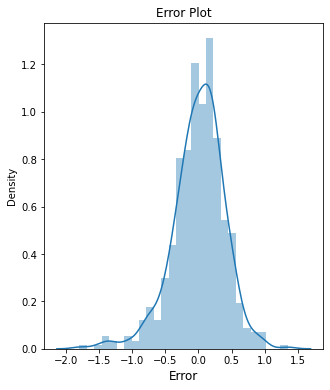

In [1352]:
plt.figure(figsize=[5,6])
sns.distplot(y_train - y_train_predict)
plt.title('Error Plot',fontsize=12)
plt.xlabel('Error',fontsize=12)
plt.show()

In [1353]:
### Errors are normally distributed at both side of mean 0.

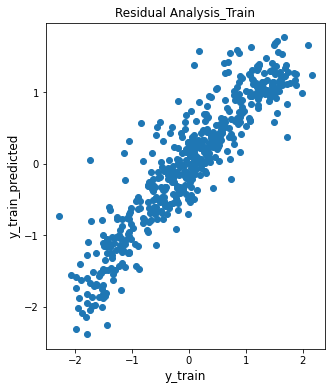

In [1354]:
plt.figure(figsize=[5,6])
plt.scatter(y_train,y_train_predict)
plt.title('Residual Analysis_Train',fontsize=12)
plt.xlabel('y_train',fontsize=12)
plt.ylabel('y_train_predicted',fontsize=12);

In [1355]:
#### SHOWING LINEAR RELATIONSHIP WITH RANDOM UNIFOM DISTRIBUTION (HOMOSCEDASTICITY)

In [1357]:
y_train

653    1.561153
576    1.398256
426   -0.215342
728   -1.378158
482   -0.136455
         ...   
526    1.115492
578    1.421307
53    -1.316175
350   -0.895103
79    -1.234214
Name: cnt, Length: 510, dtype: float64

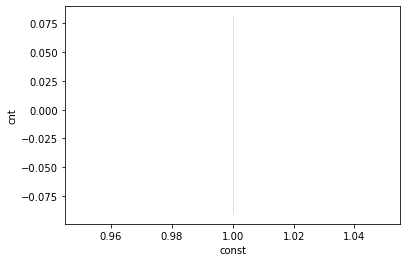

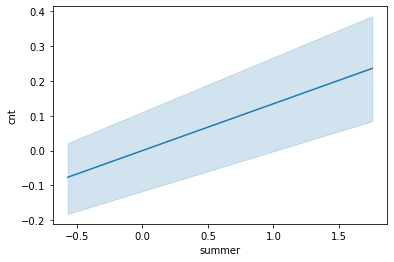

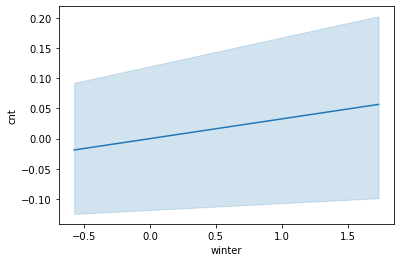

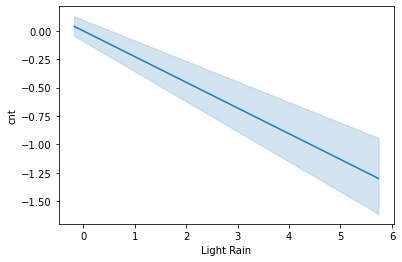

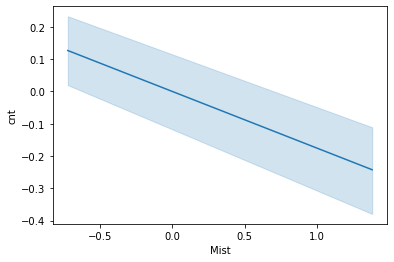

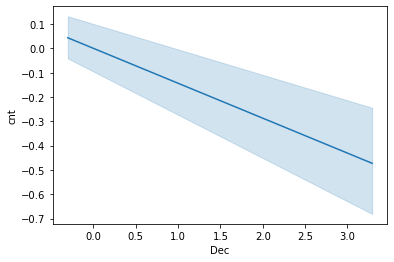

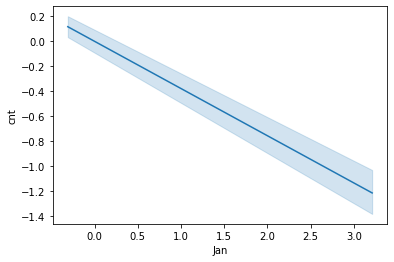

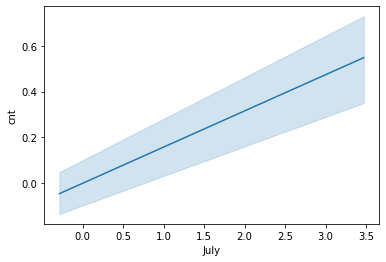

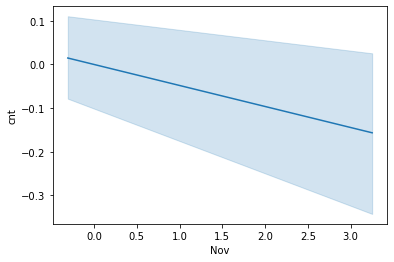

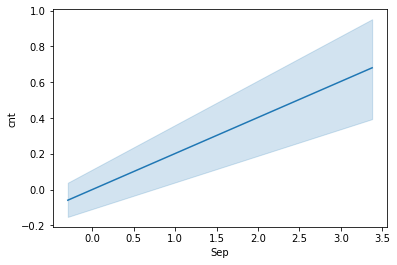

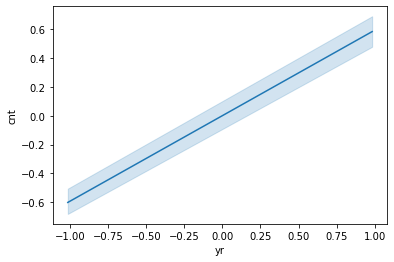

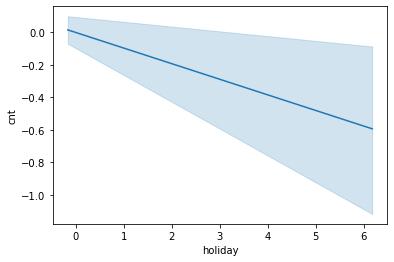

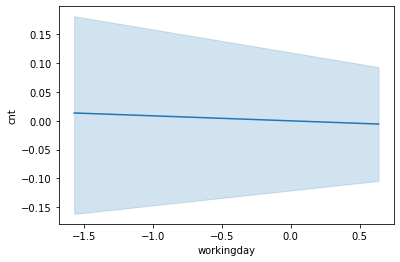

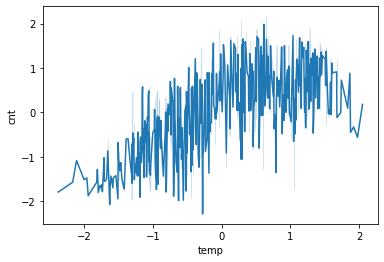

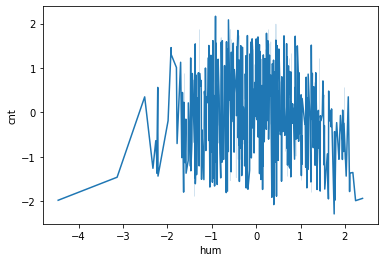

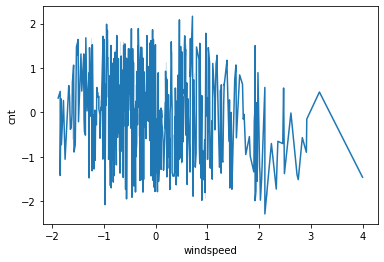

In [1359]:
for i in X_train_sm.columns:
    sns.lineplot(x=X_train_sm[i],y=y_train)
    plt.show()

### MAKING PREDICTION

In [1257]:
### DIVIDING TEST DATA SET INTO TWO PARTS

In [1258]:
y_test=df_test.pop('cnt')
X_test=df_test

In [1259]:
### USING RESIDUAL TO MAKE PREDICTION

In [1260]:
X_test_sm=sm.add_constant(X_test)

In [1261]:
X_test_sm

,const,spring,summer,winter,Light Rain,Mist,Monday,Saturday,Sunday,Thursday,...,Nov,Oct,Sep,yr,holiday,workingday,temp,atemp,hum,windspeed
184,1.0,-0.584799,-0.598835,-0.549714,-0.167453,1.455628,-0.366197,-0.457150,-0.42772,-0.405143,...,-0.280103,-0.298569,-0.307516,-0.957521,5.123921,-1.328179,1.167500,1.086194,0.126573,-1.432543
535,1.0,-0.584799,1.662284,-0.549714,-0.167453,-0.683852,-0.366197,-0.457150,-0.42772,2.456995,...,-0.280103,-0.298569,-0.307516,1.039594,-0.194272,0.749473,1.465195,1.420895,-0.190471,-0.997967
299,1.0,-0.584799,-0.598835,1.810822,-0.167453,1.455628,-0.366197,2.177478,-0.42772,-0.405143,...,-0.280103,3.334018,-0.307516,-0.957521,-0.194272,-1.328179,-0.201017,-0.169107,1.337087,0.130393
221,1.0,-0.584799,-0.598835,-0.549714,-0.167453,-0.683852,-0.366197,-0.457150,-0.42772,-0.405143,...,-0.280103,-0.298569,-0.307516,-0.957521,-0.194272,0.749473,1.380775,1.204067,-1.351984,0.163928
152,1.0,-0.584799,1.662284,-0.549714,-0.167453,-0.683852,-0.366197,2.177478,-0.42772,-0.405143,...,-0.280103,-0.298569,-0.307516,-0.957521,-0.194272,-1.328179,1.105293,0.956821,-2.176289,1.400862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1.0,1.702182,-0.598835,-0.549714,-0.167453,1.455628,-0.366197,-0.457150,-0.42772,-0.405143,...,-0.280103,-0.298569,-0.307516,1.039594,-0.194272,0.749473,-1.289610,-1.328946,0.472434,-0.162171
702,1.0,-0.584799,-0.598835,1.810822,-0.167453,-0.683852,-0.366197,-0.457150,-0.42772,-0.405143,...,-0.280103,-0.298569,-0.307516,1.039594,-0.194272,0.749473,-0.169916,-0.096767,0.789471,-0.187265
127,1.0,-0.584799,1.662284,-0.549714,-0.167453,-0.683852,-0.366197,-0.457150,-0.42772,-0.405143,...,-0.280103,-0.298569,-0.307516,-0.957521,-0.194272,0.749473,0.110008,0.203722,0.083340,-1.524500
640,1.0,-0.584799,-0.598835,1.810822,-0.167453,1.455628,-0.366197,-0.457150,-0.42772,2.456995,...,-0.280103,3.334018,-0.307516,1.039594,-0.194272,0.749473,0.798710,0.686876,1.204504,-1.633258


In [1262]:
### DROPPING ALL COLUMNS WHICHEVER HAS BEEN DROPPED IN X_train SET

In [1264]:
X_test_sm=X_test_sm[X_train_sm.columns]

In [1265]:
X_test_sm.shape

(219, 16)

In [1266]:
X_test.shape

(219, 29)

In [1267]:
X_train_sm.shape

(510, 16)

In [1268]:
X_train.shape

(510, 20)

In [1269]:
X_test_sm

,const,summer,winter,Light Rain,Mist,Dec,Jan,July,Nov,Sep,yr,holiday,workingday,temp,hum,windspeed
184,1.0,-0.598835,-0.549714,-0.167453,1.455628,-0.307516,-0.289438,2.912529,-0.280103,-0.307516,-0.957521,5.123921,-1.328179,1.167500,0.126573,-1.432543
535,1.0,1.662284,-0.549714,-0.167453,-0.683852,-0.307516,-0.289438,-0.341776,-0.280103,-0.307516,1.039594,-0.194272,0.749473,1.465195,-0.190471,-0.997967
299,1.0,-0.598835,1.810822,-0.167453,1.455628,-0.307516,-0.289438,-0.341776,-0.280103,-0.307516,-0.957521,-0.194272,-1.328179,-0.201017,1.337087,0.130393
221,1.0,-0.598835,-0.549714,-0.167453,-0.683852,-0.307516,-0.289438,-0.341776,-0.280103,-0.307516,-0.957521,-0.194272,0.749473,1.380775,-1.351984,0.163928
152,1.0,1.662284,-0.549714,-0.167453,-0.683852,-0.307516,-0.289438,-0.341776,-0.280103,-0.307516,-0.957521,-0.194272,-1.328179,1.105293,-2.176289,1.400862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1.0,-0.598835,-0.549714,-0.167453,1.455628,-0.307516,-0.289438,-0.341776,-0.280103,-0.307516,1.039594,-0.194272,0.749473,-1.289610,0.472434,-0.162171
702,1.0,-0.598835,1.810822,-0.167453,-0.683852,3.237013,-0.289438,-0.341776,-0.280103,-0.307516,1.039594,-0.194272,0.749473,-0.169916,0.789471,-0.187265
127,1.0,1.662284,-0.549714,-0.167453,-0.683852,-0.307516,-0.289438,-0.341776,-0.280103,-0.307516,-0.957521,-0.194272,0.749473,0.110008,0.083340,-1.524500
640,1.0,-0.598835,1.810822,-0.167453,1.455628,-0.307516,-0.289438,-0.341776,-0.280103,-0.307516,1.039594,-0.194272,0.749473,0.798710,1.204504,-1.633258


In [1270]:
X_test_sm.columns

Index(['const', 'summer', 'winter', 'Light Rain', 'Mist', 'Dec', 'Jan', 'July',
       'Nov', 'Sep', 'yr', 'holiday', 'workingday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [1271]:
X_train_sm.columns

Index(['const', 'summer', 'winter', 'Light Rain', 'Mist', 'Dec', 'Jan', 'July',
       'Nov', 'Sep', 'yr', 'holiday', 'workingday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [1272]:
y_test_predicted=lm6.predict(X_test_sm)

#### MODEL EVALUATION

In [1273]:
print("Test Performance:",round(r2_score(y_test, y_test_predicted)*100,2),"%")

Test Performance: 80.93 %


#### AS THE R^2 VALUE ON TESTING THE TRAINED MODEL IS SAME AS R^2 OF TRAINED MODEL SO CAN SAY MODEL IS FULLY ENABLE TO PREDICT RESULT .

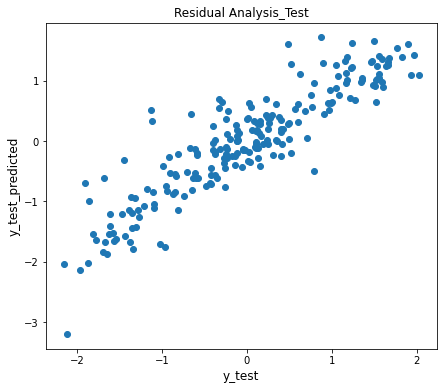

In [1276]:
plt.figure(figsize=[7,6])
plt.scatter(y_test,y_test_predicted)
plt.title('Residual Analysis_Test',fontsize=12)
plt.xlabel('y_test',fontsize=12)
plt.ylabel('y_test_predicted',fontsize=12);

#### Error points are randomely and almost uniformly distributed i.e. homoscedasticity has been found.As Error terms are not following any pattern that's why the model can be said ultimate model.

### Conclusion

### When the situation comes back to normal, the company should increse the supply, launch new offers and propaganda during the month of july, september and in the season summer,winter and spring , when the weather is good as these are the timings when demand used to be at its pick. In the rainy season , on holidays the company can reduce the bike supply to cut the maintainance and transportation cost. With passing the years company can expect increase in the demand.